In [1]:
import pandas as pd
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

import numpy as np
import pandas as pd
import polars as pl
import pyarrow.parquet as pq

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Specify the paths to the Parquet files
train_base_path = '/Users/riddhidhameliya/Desktop/My Project/capstone/home-credit-credit-risk-model-stability/data/parquet_files/train/train_base.parquet'

# Read the Parquet file into a Pandas DataFrame
train_base_df = pd.read_parquet(train_base_path)

# Print the first few rows of the DataFrame
print(train_base_df.head())

# Print original class distribution
print('Original dataset shape %s' % Counter(train_base_df['target']))


   case_id date_decision   MONTH  WEEK_NUM  target
0        0    2019-01-03  201901         0       0
1        1    2019-01-03  201901         0       0
2        2    2019-01-04  201901         0       0
3        3    2019-01-03  201901         0       0
4        4    2019-01-04  201901         0       1
Original dataset shape Counter({0: 1478665, 1: 47994})


In [3]:
# Define X and y
X = train_base_df.drop(columns=['target'])  # Extract features
y = train_base_df['target']  # Extract target

# Apply random under-sampling with specified sampling strategy
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)

# Print resampled class distribution
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 47994, 1: 47994})


In [4]:
# Create a new DataFrame for the resampled dataset
resampled_df = pd.DataFrame(X_res, columns=X.columns)
resampled_df['target'] = y_res


In [5]:
# Save the resampled dataset to a Parquet file
resampled_file_path = '/Users/riddhidhameliya/Desktop/My Project/capstone/home-credit-credit-risk-model-stability/data/parquet_files/train/resampled_dataset.parquet'
resampled_df.to_parquet(resampled_file_path, index=False)

In [6]:
resampled_df.head()

,case_id,date_decision,MONTH,WEEK_NUM,target
1059657,1653686,2019-11-29,201911,47,0
1131980,1726009,2019-12-31,201912,52,0
351856,736389,2019-07-08,201907,26,0
642802,1027343,2020-10-05,202010,91,0
71575,117009,2019-03-16,201903,10,0


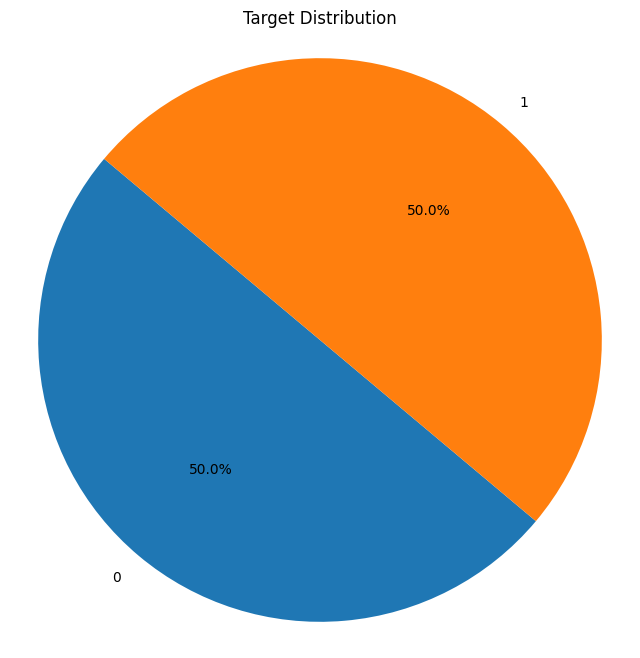

In [10]:
import matplotlib.pyplot as plt

# Calculate the counts of each target category
target_counts = resampled_df['target'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Target Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()
